<h1> Aula 5 -- Aprendizado de Máquina -- Tutoria </h1>

Edesio Alcobaça (edesio@usp.br)<br>
Outras redes: <a href="https://github.com/ealcobaca">GitHub</a> -- <a href="https://www.linkedin.com/in/edesio-alcoba%C3%A7a-344491141/">LinkedIn</a>


MBA em Ciência de Dados <br>
Universidade de São Paulo, São Carlos, Brasil<br>
Copyright (c) 2021

<h2> 1) K-Nearest Neighbors (KNN) </h2>

<h3> 1.1) Intuição: </h3>

<img src="img/space2.png" width="400">
<center>Problema binário com dois atributos. Fonte: slide da aula prof. André.</center>

<img src="img/knn-full.png" width="400">
<center>Problema binário com dois atributos. Fonte: slide da aula prof. André.</center>

<h4> Tipos de Distâncias </h4>

Existem diversos tipos de distâncias que podem ser utilizadas.
É importante entender se a distância faz sentido para o seu problema.

Umas das distâncias mais conhecidas são as distâncias de Minkowski.
* Dado espaço vetorial com norma podemos definir a distância de **Minkowski** como: 
\begin{equation*}
dist( \vec{u}, \vec{v} ) = \Big( \sum_{i=1}^m \left | u_i - v_i \right |^p \Big)^{(\frac{1}{p})}
\end{equation*}


* Para $p = 1$ temos a distância de **Manhattan**: 
\begin{equation*}
dist(\vec{u}, \vec{v}) = \sum_{i=1}^m \left | u_i - v_i \right | 
\end{equation*}

* Para $p = 2$ temos a distância **Euclidiana**: 
\begin{equation*}
dist(\vec{u}, \vec{v}) = \Big( \sum_{i=1}^m \left | u_i - v_i \right |^2 \Big)^{(\frac{1}{2})} = \sqrt{ \sum_{i=1}^m (u_i - v_i)^2}
\end{equation*}

* Para $r = \inf$ temos a distância de **Chebyshev** ou norma máxima:
\begin{equation*}
dist( \vec{u}, \vec{v} ) = \max_{i = 1,~...~, m}(| u_i - v_i |)
\end{equation*}

* Cosseno
\begin{equation*}
dist(\vec{u}, \vec{v}) = cos(\theta) = \frac{ \vec{u} \cdot \vec{v} }{\| \vec{u} \| \| \vec{v} \|} = \frac{ \sum_{i=1}^{m} u_i v_i }{ \sqrt{\sum_{i=1}^{m} u_i^2} \sqrt{\sum_{i=1}^{m} v_i^2} }
\end{equation*}


Observações:
* $u$ e $v$ podem ser vistos como exemplos de um conjunto de dados.
* $m$ o número de atributos preditivos.


<h3> 1.3) Aspectos Positivos e Negativos </h3>

Positivos:
* O conceito é simples e fácil de ser implementado.
* É aplicável mesmo para problemas complexos.
* É naturalmente incremental.
* Constrói aproximações locais da função objetivo, pode ser vantajoso quando a função é muito complexa.
* Apresenta resultados bons em situações onde há uma fronteira de decisão irregular.

Negativos:
* Não temos uma representação compacta, pois não há um modelo.
* Predição pode ser custosa.
* É afetado por atributos redundantes e ruído.
* Problema para lidar com alta dimensionalidade (maldição da dimensionalidade).

<h3> 1.3 Dicas </h3>

* Evite usar valores de $k$ que levem a um cenário de indecisão.
    * Evite usar $k \leq $ número de classes ou multiplo de k.
* Lembre-se de sempre normalizar os dados para que estejam em uma mesma escala.
* Se possível, remova ruído ou evite usar com dados ruidosos.
* Cuidado ao usar o kNN com dados de alta dimensionalidade.
    * É necessário usar uma métrica adequada (e.g., cosseno) ou fazer seleção prévia de atributos (PCA, Filtro).
* O problema de velocidade pode ser resolvido.
    * Podemos usar estrutura de dados adequadas como BallTree e KDTree.
    * Podemos usar protótipos em vez de todo o conjunto de dados.
* Em geral costuma-se remover exemplos repetidos para análise de desempenho no kNN, uma vez que isso pode causar overfitting.

<h3> 1.4) Classificação/Regressão/Probabilidade  </h3>

* **Classificação:** pode ser feito por votação/moda dos vizinhos mais próximos.
* **Regressão:** pode ser feito por meio da média/mediana dos valores dos vizinhos mais próximos.
* **Probabilidade**: pode ser estimada usando a proporção de vizinhos de cada classe.

Embora existam vários tipos de algoritmo baseados em distância, o kNN foi projetado para ser um algoritmo de classificação ou regressão. Muitas vezes ele é confundido com o kMeans para agrupamento, o que é um erro!

Implementações disponíveis no sklearn:

* [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)
* [KNeighborsRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor)
* [RadiusNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.RadiusNeighborsClassifier.html#sklearn.neighbors.RadiusNeighborsClassifier.radius_neighbors)
* [RadiusNeighborsRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.RadiusNeighborsRegressor.html#sklearn.neighbors.RadiusNeighborsRegressor)

In [1]:
import numpy as np

import matplotlib.pyplot as plt

import pandas as pd

from scipy.stats import uniform, randint

from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NeighborhoodComponentsAnalysis
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.impute import KNNImputer
from sklearn.cluster import DBSCAN
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

from mlxtend.plotting import plot_decision_regions

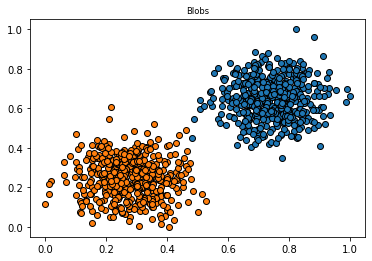

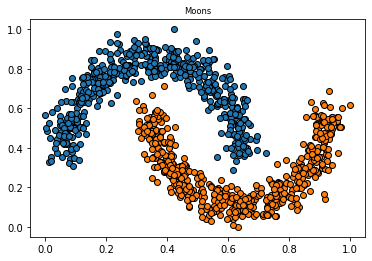

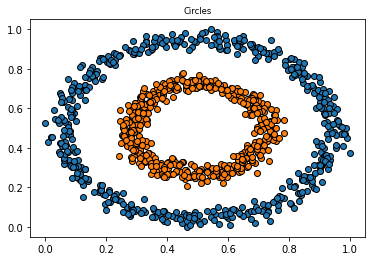

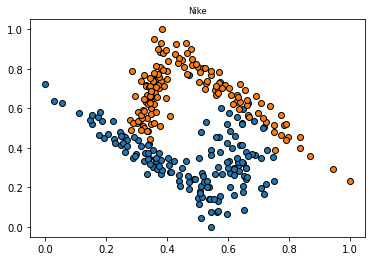

In [2]:
def plot(X, y, title="Title"):
    plt.title(title, fontsize='small')
    
    for i in np.unique(y):
        plt.scatter(X[:, 0][y==i], X[:, 1][y==i], edgecolors="k")
    plt.show()
    
n_samples = 1000

# gerar os datasets toy

n_samples = 1000

# gerar dados blobs
X, y = make_blobs(n_samples=n_samples, n_features=2, centers=2, random_state=3)
X = MinMaxScaler().fit_transform(X)
plot(X, y, "Blobs")
X_train_blobs, X_test_blobs, y_train_blobs, y_test_blobs = train_test_split(X, y, test_size = 0.2, random_state = 42)

# gerar dados moons
X, y = make_moons(n_samples=n_samples, noise=0.1, random_state=3)
X = MinMaxScaler().fit_transform(X)
plot(X, y, "Moons")
X_train_moons, X_test_moons, y_train_moons, y_test_moons = train_test_split(X, y, test_size = 0.2, random_state = 42)

# gerar dados círculo
X, y = make_circles(n_samples=n_samples, factor=.5, noise=.05)
X = MinMaxScaler().fit_transform(X)
plot(X, y, "Circles")
X_train_circles, X_test_circles, y_train_circles, y_test_circles = train_test_split(X, y, test_size = 0.2, random_state = 42)


# dado qualquer de classificação
X, y = make_classification(
    n_samples=300,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=2,
    n_clusters_per_class=2,
    weights = (0.5, 0.5),
    random_state=123
)
X = MinMaxScaler().fit_transform(X)
plot(X, y, "Nike")
X_train_nike, X_test_nike, y_train_nike, y_test_nike = train_test_split(X, y, test_size = 0.2, random_state = 42)

Evaluating model from blobs ...
Accuracy (blobs): 1.0


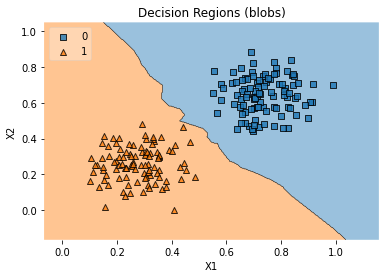

Evaluating model from circles ...
Accuracy (circles): 1.0


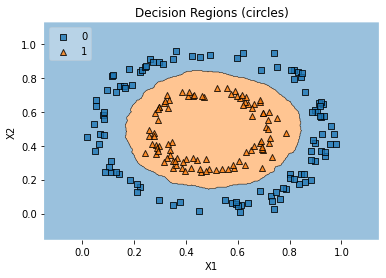

Evaluating model from moons ...
Accuracy (moons): 1.0


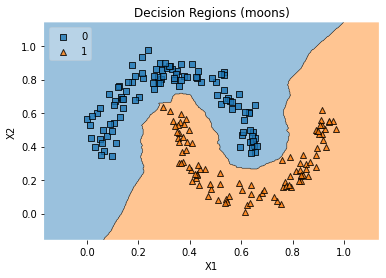

Evaluating model from nike ...
Accuracy (nike): 0.97


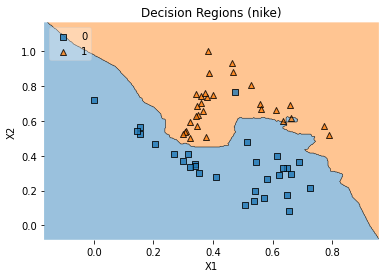

In [3]:
data = [
    ("blobs", X_train_blobs, y_train_blobs, X_test_blobs, y_test_blobs),
    ("circles", X_train_circles, y_train_circles, X_test_circles, y_test_circles),
    ("moons", X_train_moons, y_train_moons, X_test_moons, y_test_moons),
    ("nike", X_train_nike, y_train_nike, X_test_nike, y_test_nike)
]

for name, X_train, y_train, X_test, y_test in data:
    model = KNeighborsClassifier(n_neighbors=3, metric= "euclidean")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Evaluating model from {name} ...")
    
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy ({name}): {round(acc, 2)}")
    
    plot_decision_regions(X_test, y_test, clf=model, legend=2, zoom_factor=6.0)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title(f"Decision Regions ({name})")
    plt.show()

<h2> 2) Aplicações de algoritmos baseados em distância </h2>

Algoritmos baseados em distâncias podem ser usados para diversas tarefas de aprendizado de máquina:

* Classificação
* Regressão
* Agrupamento
* Imputação de valores faltantes
* Eliminação de Ruído
* Amostragem de dados
* Seleção de Atributos

<h3> 2.1) Imputação de dados faltantes </h3>


Podemos usar o kNN para fazer imputação de valores faltantes (NaN). O KNNImputer imputa o valor faltante com a média do respectivo valor para os $k$ vizinhos mais próximos de um exemplo.

In [4]:
X = [[1, 2, np.nan], [3, 4, 3], [4, 5, 7], [np.nan, 60, 50], [80, 80, 70], [40, 60, 70]]
X 

[[1, 2, nan], [3, 4, 3], [4, 5, 7], [nan, 60, 50], [80, 80, 70], [40, 60, 70]]

In [5]:
imputer = KNNImputer(n_neighbors=2)
X_imp = imputer.fit_transform(X)
X_imp

array([[ 1.,  2.,  5.],
       [ 3.,  4.,  3.],
       [ 4.,  5.,  7.],
       [60., 60., 50.],
       [80., 80., 70.],
       [40., 60., 70.]])

<h3> 2.2) Geração de novos exemplos  </h3>

Algoritmos baseados em distância, como o kNN, podem ser utilizados para geração de dados. Tal geração sintética pode ser usada para evitar que um classificador vire especialista na classe majoritária e despreze a minoritária. É um tipo de data augmentation. Desta maneira podemos criar modelos que levam em conta o desbalanceamento dos dados.

**Synthetic Minority Oversampling TEchnique(SMOTE):**
- O SMOTE seleciona exemplos próximos (por meio do kNN) e interpola-os para gerar novos exemplos. 
- Como considera apenas a classe minoritária para geração, pode levar a exemplos ambíguos se houver muita sobreposição entre as classes.


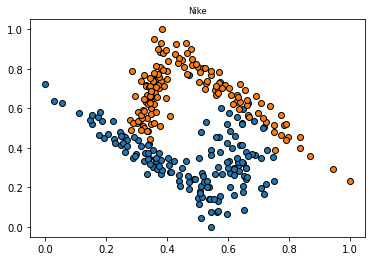

In [6]:
# dado qualquer de classificação
X, y = make_classification(
    n_samples=300,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=2,
    n_clusters_per_class=2,
    weights = (0.5, 0.5),
    random_state=123
)
X = MinMaxScaler().fit_transform(X)
plot(X, y, "Nike")

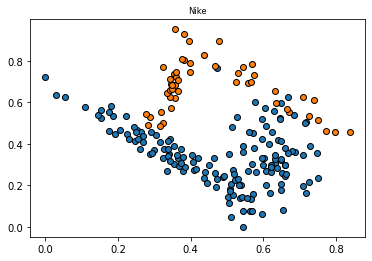

In [7]:
selected = np.random.choice(np.arange(0, y.shape[0])[y == 1], 50, replace=False)
x0 = np.arange(0, y.shape[0])[y == 0]
selected  = np.concatenate((selected, x0))

X_ = X[selected]
y_ = y[selected]
plot(X_, y_, "Nike")

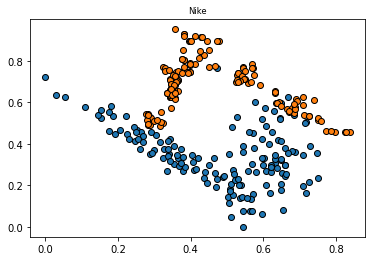

In [8]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_, y_)

plot(X_res, y_res, "Nike")

<h3> 2.3) Remoção de Ruído  </h3>

**Edited Nearest Neighbours:** aplica o kNN para “editar” o conjunto de dados, removendo amostras que não concordam “o suficiente” com sua vizinhança. Baseado na vizinhança.

(247,)


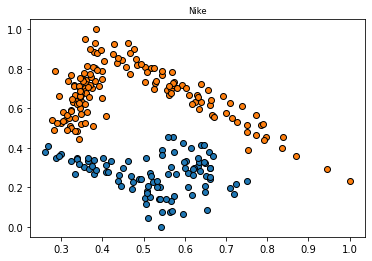

In [9]:
enn = EditedNearestNeighbours(n_neighbors=20)
X_resampled, y_resampled = enn.fit_resample(X, y)

print(y_resampled.shape)
plot(X_resampled, y_resampled, "Nike")

<h3> 2.4) Compactação de dados  </h3>

**Condensed Nearest Neighbour:**  usa k vizinhos para iterativamente decidir se pode ou não eliminar um exemplo. Baseado na performance.


(73,)


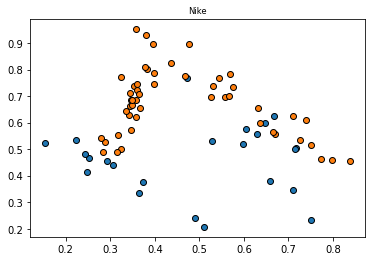

In [10]:
cnn = CondensedNearestNeighbour(sampling_strategy="majority", n_neighbors=5, random_state=0)
X_resampled, y_resampled = cnn.fit_resample(X_, y_)

print(y_resampled.shape)
plot(X_resampled, y_resampled, "Nike")

(71,)


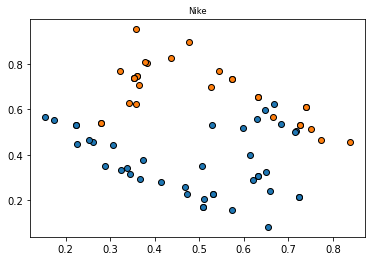

In [11]:
from imblearn.under_sampling import CondensedNearestNeighbour
cnn = CondensedNearestNeighbour(sampling_strategy="all", n_neighbors=5, random_state=0, n_seeds_S=30)
X_resampled, y_resampled = cnn.fit_resample(X_, y_)

print(y_resampled.shape)
plot(X_resampled, y_resampled, "Nike")

<h3> 2.5) Redução de dimensionalidade  </h3>

**Neighborhood Components Analysis:** Essa técnica tenta encontrar uma transformação linear no espaço das features de forma a maximizar o desempenho de algoritmos baseados em distância.

knn    : 0.5047619047619047
knn+NCA: 0.9666666666666667


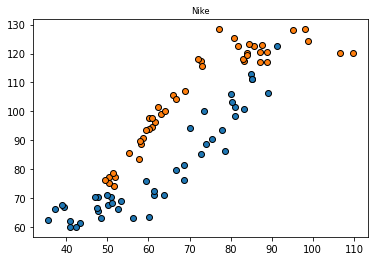

In [12]:
from sklearn.neighbors import NeighborhoodComponentsAnalysis


X_train, X_test, y_train, y_test = train_test_split(X, y,
stratify=y, test_size=0.7, random_state=42)

nca = NeighborhoodComponentsAnalysis(random_state=42)
nca.fit(X_train, y_train)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn.fit(nca.transform(X_train), y_train)

print("knn    :", knn.score(X_test, y_test))
print("knn+NCA:", knn.score(nca.transform(X_test), y_test))

plot(nca.transform(X_train), y_train, "Nike")

<h3> 2.6) Detecção de ruído / anomalia </h3>

Algumas vezes estamos interessados em descobrir se um exemplo é ou não um outlier. Algoritmos baseados em distância podem ser muito úteis para isso também. Um exemplo é o Density-Based Spatial Clustering of Applications with Noise (DBSCAN).

**DBSCAN:** É um algoritmo de agrupamento baseado em densidade que visa agrupar exemplos usando distância e uma quantidade mínima de vizinhança. Esse algoritmo também é capaz de marcar outliers, i.e., exemplos que não pertencem a nenhum grupo. Ele pode descobrir grupos de diferentes formas e densidades.

Principais hiper-parâmetros:
* **eps:** especifica quão próximos os pontos devem ser uns dos outros para serem considerados parte de um grupo. Isso significa que se a distância entre dois pontos for menor ou igual a esse valor (eps), esses pontos são considerados vizinhos.
* **minPoints:** o número mínimo de pontos para formar uma região densa. Por exemplo, se definirmos o parâmetro minPoints como 10, precisaremos de pelo menos 10 pontos para formar uma região densa.
* **metric:** métrica de distância que será utilizada.

Algoritmo:

1. visitar cada um dos exemplos do conjunto de dados.

    1.1 se há no mínimo $minPoints$ dentro de sua vizinhança de raio $eps$ então considere esse ponto parte do cluster e os de sua vizinhança também.
    
    1.2 caso contrário o ponto é um outlier.

<img src="img/dbscan.gif" width="800">
<center><a href="https://www.digitalvidya.com/blog/the-top-5-clustering-algorithms-data-scientists-should-know/">Fonte</a> </center>


Há geralmente três tipos de pontos no DBSCAN:

<img src="img/dbscan_final.png" width="800">
<center><a href="https://www.kdnuggets.com/2020/04/dbscan-clustering-algorithm-machine-learning.html">Fonte</a> </center>


- **core:** este é um ponto que tem pelo menos $k$ pontos dentro de uma distância $\epsilon$ de si mesmo.
- **border:** este é um ponto que tem pelo menos um ponto core à distância $\epsilon$.
- **noise:** este é um ponto que não é nem core, nem border. E tem menos de $k$ pontos dentro de uma distância $\epsilon$ de si mesmo.


**Rule of thumb que podem ajudar:**
- minPoints
    - geralmente se ajusta para o número de features + 1.
    - valores altos são bons para conjunto de dados com ruído.
    
- eps
    - se for muito pequeno uma grande parte dos dados pode não ser agrupada e então ser considerada como ruído.
    - se o valor for muito grande não haverá divisão dos grupos. Estes então estarão unidos em um mesmo grupo. Você pode observar qual a distância média do conjunto de dados e usar algo próximo disso.


**Pontos positivos:**
- não precisa saber o número de clusters previamente (ao contrário do K-means).
- pode aleatoriamente encontrar grupos com formatos bem diferentes.
- consegue identificar ruído.

**Pontos negativos:**
- conjuntos de dados com densidades variáveis podem causar problema.
- os parâmetros eps e minPoints podem ser difíceis de estimar, vai depender de cada problema.
- complexidade computacional pode chegar a $O(n^2)$


**Para que podemos usar?**
* recomendação de produtos por meio de agrupamento.
* detecção de padrões.
* detecção de ouliers ou ruído.

**Aspectos comparativos interessantes**
- no kMeans a mudança na ordem do conjunto de dados altera o resultado. Isso é minimizado no DBSCAN.
- no kMenas você precisa especificar o número de cluster k, já o DBSCAN encontra automaticamente.

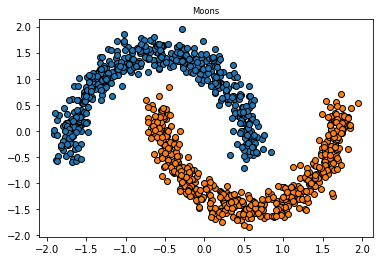

In [15]:
# gerar dados moons
X, y = make_moons(n_samples=n_samples, noise=0.08, random_state=3)
X = StandardScaler().fit_transform(X)
plot(X, y, "Moons")

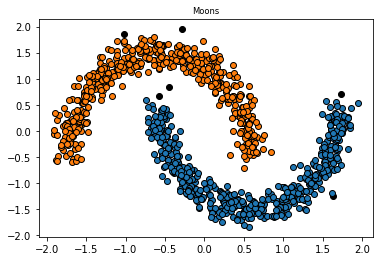

In [16]:
db = DBSCAN(eps=0.2, min_samples=10).fit(X)

y_ = db.labels_
plt.title("Moons", fontsize='small')
for i in np.unique(y_):
    if i == -1:
        plt.scatter(X[:, 0][y_==i], X[:, 1][y_==i], c="black", edgecolors="k")
    else:
        plt.scatter(X[:, 0][y_==i], X[:, 1][y_==i], edgecolors="k")
plt.show()

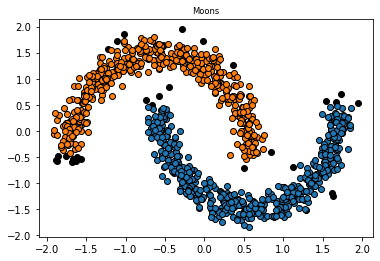

In [17]:
db = DBSCAN(eps=0.2, min_samples=20).fit(X)

y_ = db.labels_
plt.title("Moons", fontsize='small')
for i in np.unique(y_):
    if i == -1:
        plt.scatter(X[:, 0][y_==i], X[:, 1][y_==i], c="black", edgecolors="k")
    else:
        plt.scatter(X[:, 0][y_==i], X[:, 1][y_==i], edgecolors="k")
plt.show()

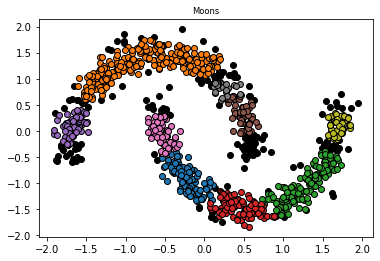

In [18]:
db = DBSCAN(eps=0.2, min_samples=30).fit(X)

y_ = db.labels_
plt.title("Moons", fontsize='small')
for i in np.unique(y_):
    if i == -1:
        plt.scatter(X[:, 0][y_==i], X[:, 1][y_==i], c="black", edgecolors="k")
    else:
        plt.scatter(X[:, 0][y_==i], X[:, 1][y_==i], edgecolors="k")
plt.show()

Observem que para o conjunto de dados da nike, não há uma separação visível das duas classes. Por causa disso, o DBSCAN não irá conseguir separa-las, a não ser criando vários outros cluster menores.

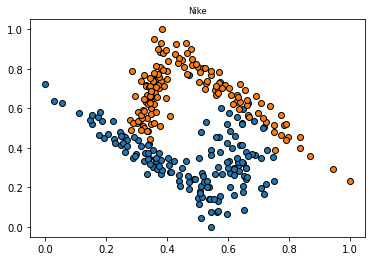

In [39]:
# dado qualquer de classificação
X, y = make_classification(
    n_samples=300,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=2,
    n_clusters_per_class=2,
    weights = (0.5, 0.5),
    random_state=123
)
X = MinMaxScaler().fit_transform(X)
plot(X, y, "Nike")

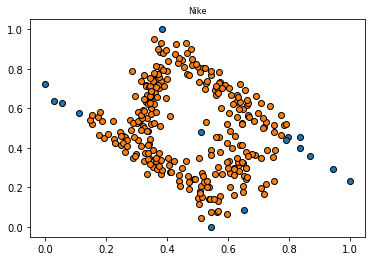

In [40]:
db = DBSCAN(eps=0.1, min_samples=20).fit(X)
plot(X, db.labels_, "Nike")

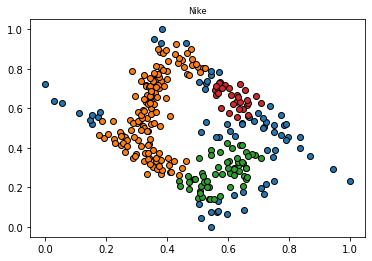

In [44]:
db = DBSCAN(eps=0.1, min_samples=30).fit(X)
plot(X, db.labels_, "Nike")

<h3> 2.7) Alguns algoritmos baseados em distância disponíveis em Python  </h3>

* [NearestCentroid](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestCentroid.html#sklearn.neighbors.NearestCentroid)
* [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN)
* [SpectralClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html#sklearn.cluster.SpectralClustering)
* [Isomap](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.Isomap.html#sklearn.manifold.Isomap)
* [TSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html#sklearn.manifold.TSNE)
* [NeighborhoodComponentsAnalysis](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NeighborhoodComponentsAnalysis.html#sklearn.neighbors.NeighborhoodComponentsAnalysis)
* [KNNImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html)
* [Edited data set using nearest neighbours](https://imbalanced-learn.org/stable/under_sampling.html#edited-data-set-using-nearest-neighbours)
* [Condensed nearest neighbors and derived algorithms](https://imbalanced-learn.org/stable/under_sampling.html#condensed-nearest-neighbors-and-derived-algorithms)

<h2> 3) Predição de câncer com dados de expressão gênica  </h2>

In [19]:
import pandas as pd

# df = pd.read_csv("brca_mirnaseq.csv")
df = pd.read_csv("brca_mirnaseq_modif.csv")
df

hsa.let.7a.1  hsa.let.7a.2  hsa.let.7a.3    hsa.let.7b   hsa.let.7c  \
0     8962.996542  17779.575039   9075.200383  24749.898857   341.298400   
1     7739.739862  15524.941906   7713.626636  23374.640471   801.487258   
2     8260.612670  16497.981335   8355.342958  10957.355911   635.811272   
3     9056.241254  18075.168478   9097.666150  26017.522731  2919.348415   
4    10897.303665  21822.338727  10963.956320  22204.253575  3313.009950   
..            ...           ...           ...           ...          ...   
837  10628.975280  21125.108661  10585.686678  23396.813364  3892.051211   
838           NaN  33603.904432  16883.338223  20731.006597  5263.331356   
839  13120.807001  26337.935723  13229.425112  18796.895124  6581.549565   
840   7979.531224  16006.280243   8106.687917  20462.010937          NaN   
841  10439.110392  20880.967721  10649.126224  17770.685685          NaN   

     hsa.let.7d   hsa.let.7e  hsa.let.7f.1  hsa.let.7f.2  hsa.let.7g  ...  \
0    406.164781  1470.179650     14.716795   3627.642977  387.417272  ...   
1    513.297924   560.962427     20.922042   6557.093894  350.955461  ...   
2    620.351816  2694.331127     39.799878  11830.760394  600.725980  ...   
3    334.245155  1322.434475     17.866463   6438.725384  354.957604  ...   
4    350.615669  1711.886682     22.541895   8246.117280  333.425447  ...   
..          ...          ...           ...           ...         ...  ...   
837  367.141461  1484.663795     23.402901  10570.535667  571.680109  ...   
838  201.676038  2173.283559     36.888271  18227.341203  870.301142  ...   
839  375.598820  2547.029500     28.505268  16838.042944  778.398745  ...   
840  295.594442   962.166120     23.885025   7625.121634  428.411748  ...   
841  790.868182  1952.822603     29.966587  10936.555740  577.855691  ...   

     fake-192  fake-193  fake-194  fake-195  fake-196  fake-197  fake-198  \
0     43636.0   75828.0    6856.0   89008.0   87951.0       NaN   18509.0   
1     74546.0   90207.0   55466.0    1152.0   15584.0   28867.0   15849.0   
2     10422.0       NaN   17129.0   33935.0   61068.0   16220.0   86785.0   
3     77235.0   72688.0    1026.0   24093.0   17653.0   45512.0   56676.0   
4         NaN   15543.0   43110.0   27637.0   54084.0   48713.0   38187.0   
..        ...       ...       ...       ...       ...       ...       ...   
837       NaN   90689.0   51475.0   42998.0   18381.0   69489.0   16147.0   
838   99625.0   57842.0       NaN   96798.0   44508.0       NaN   36080.0   
839   20897.0   68428.0   88440.0   59931.0   31440.0   92479.0   10110.0   
840   34514.0   84475.0   58075.0   97276.0   37185.0    8052.0   83554.0   
841   25936.0   52056.0   79850.0   66773.0   54087.0   18543.0   19554.0   

     fake-199  fake-200  class  
0     57203.0   97680.0      N  
1     98398.0    6731.0      N  
2     49308.0   59309.0      N  
3      9335.0   78698.0      N  
4     65119.0   76050.0      N  
..        ...       ...    ...  
837       NaN   91175.0      N  
838   79501.0    5688.0      N  
839    9944.0   24438.0      N  
840   17630.0   67263.0      N  
841   26865.0   64844.0      N  

[842 rows x 1098 columns]

In [20]:
df.shape

(842, 1098)

In [21]:
df.describe()

hsa.let.7a.1  hsa.let.7a.2  hsa.let.7a.3     hsa.let.7b    hsa.let.7c  \
count    767.000000    759.000000    770.000000     762.000000    747.000000   
mean    9193.165901  18218.676268   9383.551851   26700.091617   3102.385068   
std     4849.875454   9588.197650   4840.359207   16751.529431   3277.092835   
min     1294.149164   2599.981125   1319.952907    1817.920354    148.795934   
25%     5904.258802  11664.368277   6136.197311   14854.934519   1252.907631   
50%     7980.945995  15945.879612   8196.775774   23236.006861   2270.457639   
75%    11199.515299  22401.968736  11473.965780   34281.660688   3903.603696   
max    45101.697434  90233.655610  45095.490102  144706.427973  59677.212349   

        hsa.let.7d    hsa.let.7e  hsa.let.7f.1  hsa.let.7f.2   hsa.let.7g  \
count   758.000000    764.000000    760.000000    760.000000   764.000000   
mean    560.248965   1281.388689     24.291832   8715.604416   607.835079   
std     353.888400    768.879496     12.162868   6096.845805   313.867232   
min      80.169676    161.181457      2.439034    653.474578    88.614573   
25%     331.031068    805.817069     16.329915   4711.248574   410.567605   
50%     481.959498   1089.527595     21.920409   7019.157941   535.544697   
75%     679.958778   1603.236666     29.486847  11073.480173   722.004927   
max    3370.036117  11617.011618    101.003390  80780.055188  3342.745045   

       ...      fake-191      fake-192      fake-193      fake-194  \
count  ...    773.000000    761.000000    753.000000    761.000000   
mean   ...  49976.934023  51848.471748  50430.261620  49049.629435   
std    ...  28479.936875  29708.221009  28309.972939  28303.308231   
min    ...   1158.000000   1198.000000   1069.000000   1026.000000   
25%    ...  25904.000000  26159.000000  26333.000000  25590.000000   
50%    ...  47534.000000  54684.000000  48555.000000  48324.000000   
75%    ...  74449.000000  77336.000000  75661.000000  72864.000000   
max    ...  99883.000000  99924.000000  99876.000000  99850.000000   

           fake-195      fake-196      fake-197      fake-198      fake-199  \
count    742.000000    747.000000    761.000000    746.000000    763.000000   
mean   49695.353100  51041.568942  50206.511170  50247.722520  50491.221494   
std    28217.405993  28863.099575  28533.997833  28209.098038  29112.004224   
min     1152.000000   1102.000000   1138.000000   1211.000000   1048.000000   
25%    24802.250000  24802.000000  24524.000000  25502.500000  24464.500000   
50%    49446.000000  53540.000000  49918.000000  49776.500000  50124.000000   
75%    72319.500000  75912.500000  74455.000000  74843.750000  76541.000000   
max    99992.000000  99864.000000  99932.000000  99618.000000  99880.000000   

           fake-200  
count    761.000000  
mean   50703.266754  
std    29746.709798  
min     1536.000000  
25%    24631.000000  
50%    49742.000000  
75%    77087.000000  
max    99752.000000  

[8 rows x 1097 columns]

In [22]:
df["class"].describe()

count     842
unique      2
top         N
freq      755
Name: class, dtype: object

In [23]:
perc_min = round(100*(df["class"] == "P").sum() / df.shape[0], 2)
print(perc_min, "%")

10.33 %


Temos alguns problemas que precisamos tratar aqui:

* Alta dimensionalidade
* Dados em escala diferente
* Desbalanceamento
* Valores faltantes

In [24]:
X, y = df.iloc[:, :-1].to_numpy(), df["class"].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=0)

In [25]:
np.unique(y_train, return_counts=True)[1] / y_train.shape[0] # treino

array([0.89698891, 0.10301109])

In [26]:
np.unique(y_test, return_counts=True)[1] / y_test.shape[0] # teste

array([0.8957346, 0.1042654])

Vamos desenvolver um baseline:

--> valores faltantes [ok]

--> Dados em escala diferente [ok]

In [27]:
pipe = Pipeline([
    ("knni", KNNImputer(n_neighbors=5)),
    ("mmscaler", MinMaxScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=5, metric="cosine"))
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

balanced_accuracy_score(y_test, y_pred)

0.9291726791726791

--> Alta dimensionalidade [OK]

In [28]:
pipe = Pipeline([
    ("knni", KNNImputer(n_neighbors=5)),
    ("mmscaler", MinMaxScaler()),
    ("pca", PCA(n_components=0.95)),
    ("knn", KNeighborsClassifier(n_neighbors=5))
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

balanced_accuracy_score(y_test, y_pred)

0.9291726791726791

In [29]:
pipe = Pipeline([
    ("knni", KNNImputer(n_neighbors=5)),
    ("mmscaler", MinMaxScaler()),
    ("pca", NeighborhoodComponentsAnalysis(n_components=10, random_state=42)),
    ("knn", KNeighborsClassifier(n_neighbors=5))
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

balanced_accuracy_score(y_test, y_pred)

0.9973544973544973

--> Queremos agora interpretar as features no modelo diretamente

In [30]:
pipe = Pipeline([
    ("knni", KNNImputer(n_neighbors=5)),
    ("variance", VarianceThreshold(threshold=0)),
    ("mmscaler", MinMaxScaler()),
    ("kbest", SelectKBest(k=20)),
    ("knn", KNeighborsClassifier(n_neighbors=5))
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

balanced_accuracy_score(y_test, y_pred)

0.9413179413179413

--> Podemos ainda tentar remover possíveis ruídos

In [31]:
pipe = Pipeline([
    ("knni", KNNImputer(n_neighbors=5)),
    ("variance", VarianceThreshold(threshold=0)),
    ("mmscaler", MinMaxScaler()),
    ("kbest", SelectKBest(k=20)),
    ("cnn", EditedNearestNeighbours()),
    ("knn", KNeighborsClassifier(n_neighbors=5))
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

balanced_accuracy_score(y_test, y_pred)

0.964045214045214

In [32]:
X_train.shape[0], len(pipe["cnn"].sample_indices_)

(631, 619)

--> Compactar o modelo

In [33]:
pipe = Pipeline([
    ("knni", KNNImputer(n_neighbors=5)),
    ("variance", VarianceThreshold(threshold=0)),
    ("mmscaler", MinMaxScaler()),
    ("kbest", SelectKBest(k=20)),
    ("cnn", CondensedNearestNeighbour(random_state=0)),
    ("knn", KNeighborsClassifier(n_neighbors=5))
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

balanced_accuracy_score(y_test, y_pred)

0.9841269841269842

In [34]:
X_train.shape[0], len(pipe["cnn"].sample_indices_)

(631, 91)

In [35]:
def gaussian_kernel(distances):
    krenel_width = 2
    return np.exp(-(distances**2)/krenel_width)

pipe = Pipeline([
    ("knni", KNNImputer(n_neighbors=5)),
    ("variance", VarianceThreshold(threshold=0)),
    ("mmscaler", MinMaxScaler()),
    ("kbest", SelectKBest(k=20)),
    ("cnn", CondensedNearestNeighbour(random_state=0)),
    ("knn", KNeighborsClassifier(n_neighbors=5))
])

distributions = dict(
    knni__n_neighbors=randint(1, 5),
    kbest__k=randint(1, 20),
    knn__n_neighbors=randint(1, 20),
    knn__p=uniform(loc=1, scale=3),
    knn__weights=["uniform", "distance", gaussian_kernel]
)

clf = RandomizedSearchCV(
    pipe,
    distributions,
    n_iter=50,
    scoring="balanced_accuracy",
    cv=5,
    n_jobs=4,
    random_state=42
)

search = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.9920634920634921

In [36]:
search.best_params_

{'kbest__k': 10,
 'knn__n_neighbors': 13,
 'knn__p': 1.6051576070061886,
 'knn__weights': <function __main__.gaussian_kernel(distances)>,
 'knni__n_neighbors': 1}

In [37]:
clf

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('knni', KNNImputer()),
                                             ('variance',
                                              VarianceThreshold(threshold=0)),
                                             ('mmscaler', MinMaxScaler()),
                                             ('kbest', SelectKBest(k=20)),
                                             ('cnn',
                                              CondensedNearestNeighbour(random_state=0)),
                                             ('knn', KNeighborsClassifier())]),
                   n_iter=50, n_jobs=4,
                   param_distributions={'kbest__k': <scipy.stats._distn_infrastructure.rv_frozen...
                                        'knn__n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f0c72660ee0>,
                                        'knn__p': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f0c71b50040>,
  

In [38]:
clf.best_estimator_["kbest"].transform(clf.best_estimator_["variance"].transform([df.columns[:-1]]))

array([['hsa.mir.100', 'hsa.mir.10b', 'hsa.mir.1258', 'hsa.mir.125b.1',
        'hsa.mir.139', 'hsa.mir.145', 'hsa.mir.3199.2', 'hsa.mir.337',
        'hsa.mir.365.1', 'hsa.mir.99a']], dtype=object)

<h2> Referencias </h2>

- [Peterson, Leif E. "K-nearest neighbor." Scholarpedia 4.2 (2009): 1883.](http://scholarpedia.org/article/K-nearest_neighbor)

- [Ester, Martin, et al. "A density-based algorithm for discovering clusters in large spatial databases with noise." kdd. Vol. 96. No. 34. 1996.](https://www.aaai.org/Papers/KDD/1996/KDD96-037.pdf?source=post_page)

- [Schubert, Erich, et al. "DBSCAN revisited, revisited: why and how you should (still) use DBSCAN." ACM Transactions on Database Systems (TODS) 42.3 (2017): 1-21.](https://dl.acm.org/doi/abs/10.1145/3068335?casa_token=iu7j3I2x9EAAAAAA:x4r7YmqZ_-OmlmYVJnkVRJYEcNFPQgFpzLDWk2ucgkX49PJBnvJvK8eWggA2HmsFYWgRsXq8ExkoVL4)

- [Wilson, Dennis L. "Asymptotic properties of nearest neighbor rules using edited data." IEEE Transactions on Systems, Man, and Cybernetics 3 (1972): 408-421.](https://ieeexplore.ieee.org/abstract/document/4309137?casa_token=F8DDguMfXvgAAAAA:ozE5Oo2_-7aSkIj2CjsVgHAwWKicdMt5pK3oRV2XpbglpveyJNGD5gXuT5cR6aLUiVAfpdyNElHb)

- [Hart, Peter. "The condensed nearest neighbor rule (corresp.)." IEEE transactions on information theory 14.3 (1968): 515-516.](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.294.6968&rep=rep1&type=pdf)

- [Beretta, Lorenzo, and Alessandro Santaniello. "Nearest neighbor imputation algorithms: a critical evaluation." BMC medical informatics and decision making 16.3 (2016): 197-208.](https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-016-0318-z)



Links:
* https://ichi.pro/pt/um-guia-pratico-para-o-metodo-dbscan-234111599033497
* https://www.kdnuggets.com/2020/04/dbscan-clustering-algorithm-machine-learning.html
* https://www.analyticsvidhya.com/blog/2020/09/how-dbscan-clustering-works/

